In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.image as mpimg

In [2]:
def lorenzkey(x0,y0,z0, num_steps):
    dt = 0.01
    x= np.empty(num_steps+1)
    y= np.empty(num_steps+1)
    z= np.empty(num_steps+1)
    #setting initial conditions
    x[0], y[0], z[0] =(x0,y0,z0)

   

    #settings the values of the control parameter
    s=10
    r=28
    b=2.667

    #setting up equations
    for i in range(num_steps):
        x[i+1]= x[i]+(s*(y[i]-x[i])*dt)
        y[i+1]= y[i]+((x[i]*(r - z[i]) - y[i])*dt)
        z[i+1]= z[i]+((x[i]*y[i] - b*z[i])*dt)
    return x, y, z

### Beauty of Lorentz attractor lies in the fact that it is completely deterministic yet unpredictable

In [3]:
# # plotting 
# fig = plt.figure()
# ax = fig.gca(projection='3d')

# ax.plot(x, y, z, lw = 0.5)
# ax.set_xlabel("X Axis")
# ax.set_ylabel("Y Axis")
# ax.set_zlabel("Z Axis")
# ax.set_title("Lorentz Attractor")

# plt.show()

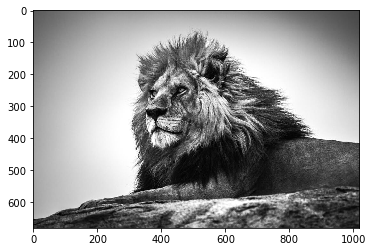

In [4]:
img = mpimg.imread('lion.jpg')
plt.imshow(img)
plt.show()

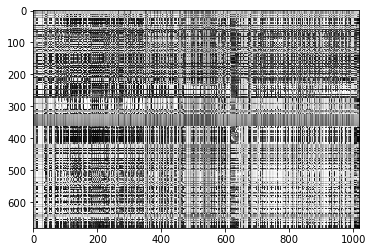

In [5]:
#Working on encryption 
h= img.shape[0]
w= img.shape[1]

xkey=[]
ykey=[]
zkey=[]

xkey, ykey, zkey= lorenzkey(0.01, 0.02,0.03, h*w)

#we will use xkey and ykey to shuffle rows and columns, while zkey will be used to substitution
#Encryption-Shuffling
l=0
xindex=[]
yindex=[]
encimg1 = np.zeros(shape=[h, w, 3],dtype = np.uint8)
encimg2 = np.zeros(shape=[h, w, 3],dtype = np.uint8)
encimg3 = np.zeros(shape=[h, w, 3],dtype = np.uint8)
decimg1 = np.zeros(shape=[h, w, 3],dtype = np.uint8)
decimg2 = np.zeros(shape=[h, w, 3],dtype = np.uint8)
decimg3 = np.zeros(shape=[h, w, 3],dtype = np.uint8)

for i in range(w):
    xindex.append(i)
for j in range(h):
    yindex.append(j)   
    
    
#Shuffling the indices
for i in range(w):
    for j in range(w):
        if(xkey[i]>xkey[j]):
            xkey[i], xkey[j] = xkey[j], xkey[i]
            xindex[i], xindex[j] = xindex[j] , xindex[i]

for i in range(h):
    for j in range(h):
        if(ykey[i]>ykey[j]):
            ykey[i], ykey[j] = ykey[j], ykey[i]
            yindex[i], yindex[j] = yindex[j] , yindex[i]

            
#     
# for i in range(h):
#     k=0
#     for j in range(h):
#         encimg1[i][j] = img[yindex[k]][i]
#         k=k+1

#column wise encryption using xindex
for i in range(h):
    k=0
    for j in range(w):
        encimg1[i][j]= img[i][xindex[k]]
        k=k+1
                    
#for i in range(h):
#   k=0
#   for j in range(w):
#       encimg2[i][j] = encimg1[i][xindex[k]]
#       k=k+1
#        
#   
# rowwise shuffling using yindex
for i in range(w):
    k=0
    for j in range(h):
        encimg2[j][i] = encimg1[yindex[k]][i]
        k=k+1

plt.imshow(encimg2)
plt.show()

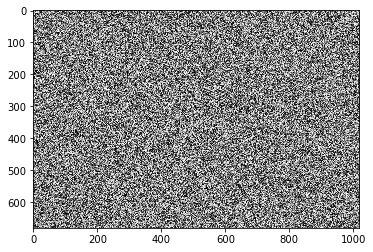

In [6]:
#Encryption using Substitution

l=0
for i in range(h):
    for j in range(w):
        zk=(int((zkey[l]*pow(10,12))%256))
        encimg3[i][j]=encimg2[i,j]^zk
        l+=1
plt.imshow(encimg3)
plt.show()

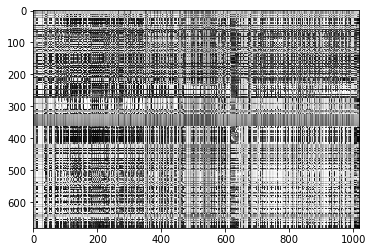

In [7]:
#obtaining original image back
l=0
for i in range(h):
    for j in range(w):
        zk=(int((zkey[l]*pow(10,12))%256))
        decimg3[i][j]=encimg3[i,j]^zk
        l+=1
plt.imshow(decimg3)
plt.show()

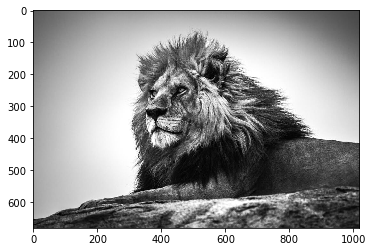

In [8]:
#rowwise
for i in range(w):
    k=0
    for j in range(h):
        decimg1[yindex[k]][i] = decimg3[j][i]
        k+=1
        
#cloumnwise
for i in range(h):
    k=0
    for j in range(w):
        decimg2[i][xindex[k]] = decimg1[i][j]
        k+=1


plt.imshow(decimg2)
plt.show()